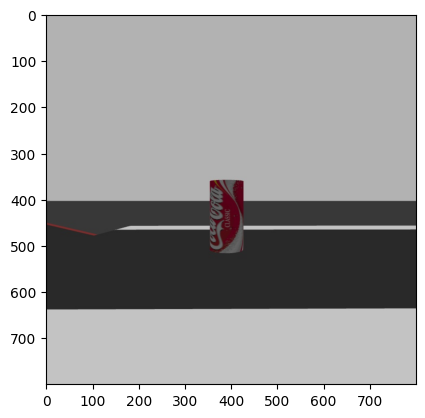

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('dataset/train/0/savedImage-P0WL9I2E46.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

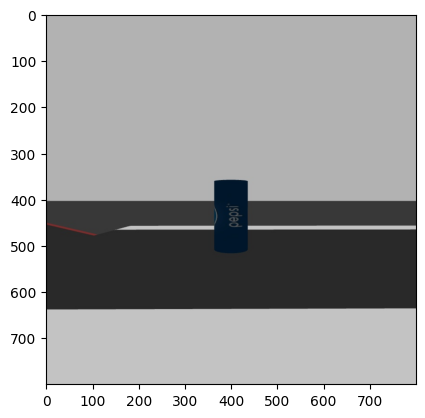

In [8]:
image = cv2.imread('dataset/train/1/savedImage-4I89LRJR4D.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

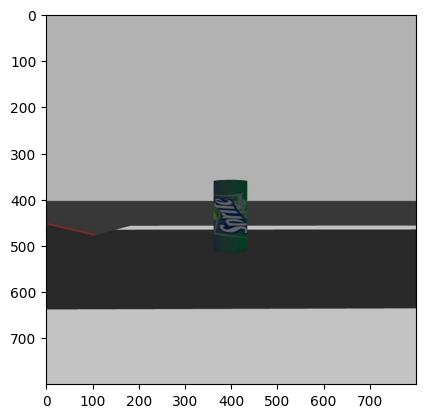

In [9]:
image = cv2.imread('dataset/train/2/savedImage-EBW0RQV5SV.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [21]:
train_dataset=train.flow_from_directory('dataset/train/',
                                       target_size=(224,224),
                                       batch_size= 16,
                                       class_mode='categorical')
validation_dataset=validation.flow_from_directory('dataset/val/',
                                       target_size=(224,224),
                                       batch_size= 16,
                                       class_mode='categorical')

Found 2838 images belonging to 3 classes.
Found 709 images belonging to 3 classes.


In [22]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape=(224,224,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
                                 ])

model.compile(loss='categorical_crossentropy',
		      optimizer=RMSprop(learning_rate=0.001),
		      metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 64)      

In [24]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=10,
                     epochs=50,
                     validation_data= validation_dataset)

Epoch 1/50
10/10 [==============================] - 11s 1s/step - loss: 0.6215 - accuracy: 0.7812 - val_loss: 0.8487 - val_accuracy: 0.6615
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 0.4981 - accuracy: 0.8625 - val_loss: 0.2915 - val_accuracy: 0.9647
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 0.1937 - accuracy: 0.9563 - val_loss: 0.9362 - val_accuracy: 0.7010
Epoch 4/50
10/10 [==============================] - 10s 1s/step - loss: 0.3156 - accuracy: 0.8813 - val_loss: 0.3059 - val_accuracy: 0.7757
Epoch 5/50
10/10 [==============================] - 10s 1s/step - loss: 0.3028 - accuracy: 0.8250 - val_loss: 0.9479 - val_accuracy: 0.6996
Epoch 6/50
10/10 [==============================] - 10s 1s/step - loss: 0.3054 - accuracy: 0.9187 - val_loss: 0.2481 - val_accuracy: 0.7518
Epoch 7/50
10/10 [==============================] - 10s 1s/step - loss: 0.0885 - accuracy: 0.9625 - val_loss: 0.0668 - val_accuracy: 1.0000
Epoch 8/50
10/10 [==

In [25]:
model.save_weights('weights.h5')

In [26]:
model.save('model.h5')